In [ ]:
# ÌïúÍ∏Ä ÏÑ§Ïπò
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,150 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and dire

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.metrics import silhouette_score
import pandas as pd
import warnings
import re
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')

##Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≥ëÌï©

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [ ]:
!pip install openpyxl

(1) Í≥†Î†πÏûê Ïù∏Íµ¨ & ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†

In [ ]:
df_raw =pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñå·Ö°·Ñâ·Ö°·ÜØ·ÑÖ·Ö≤·ÜØ(·ÑÄ·ÖÆ·Ñá·Öß·ÜØ).xlsx")

# Ï†ÑÍµ≠ ÌèâÍ∑† ÏûêÏÇ¥Î•† Ï†ïÎ≥¥ (Îã®ÏúÑ: Î™Ö / 10ÎßåÎ™Ö)
national_elderly_suicide_rate = 40.6
national_total_suicide_rate = 27.3

# ÏûêÏπòÍµ¨Î≥Ñ ÏûêÏÇ¥Î•† Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è 0Ìñâ Ï†úÍ±∞
df = df_raw.iloc[1:].copy()  # 0Ìñâ(ÏÜåÍ≥Ñ) Ï†úÍ±∞

# ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú Î∞è Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
df = df[['ÏûêÏπòÍµ¨Î≥Ñ', 'ÏûêÏÇ¥Î•† (10ÎßåÎ™ÖÎãπ Î™Ö)']]
df.rename(columns={
    'ÏûêÏπòÍµ¨Î≥Ñ': 'ÏûêÏπòÍµ¨',
    'ÏûêÏÇ¥Î•† (10ÎßåÎ™ÖÎãπ Î™Ö)': 'Ï†ÑÏ≤¥ ÏûêÏÇ¥Î•†'
}, inplace=True)

# 3Ô∏èÏûêÏπòÍµ¨Î≥Ñ Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•† Ïó¥ Ï∂îÍ∞Ä
df['Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†'] = df['Ï†ÑÏ≤¥ ÏûêÏÇ¥Î•†'] * (national_elderly_suicide_rate / national_total_suicide_rate)

df = df[['ÏûêÏπòÍµ¨', 'Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†']]

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†
1    Ï¢ÖÎ°úÍµ¨  36.435897
2     Ï§ëÍµ¨  43.723077
3    Ïö©ÏÇ∞Íµ¨  32.271795
4    ÏÑ±ÎèôÍµ¨  34.353846
5    Í¥ëÏßÑÍµ¨  40.451282
6   ÎèôÎåÄÎ¨∏Íµ¨  37.179487
7    Ï§ëÎûëÍµ¨  40.600000
8    ÏÑ±Î∂ÅÍµ¨  33.164103
9    Í∞ïÎ∂ÅÍµ¨  37.030769
10   ÎèÑÎ¥âÍµ¨  41.194872
11   ÎÖ∏ÏõêÍµ¨  35.841026
12   ÏùÄÌèâÍµ¨  34.353846
13  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667
14   ÎßàÌè¨Íµ¨  32.123077
15   ÏñëÏ≤úÍµ¨  33.164103
16   Í∞ïÏÑúÍµ¨  31.379487
17   Íµ¨Î°úÍµ¨  32.569231
18   Í∏àÏ≤úÍµ¨  40.600000
19  ÏòÅÎì±Ìè¨Íµ¨  27.215385
20   ÎèôÏûëÍµ¨  29.148718
21   Í¥ÄÏïÖÍµ¨  43.574359
22   ÏÑúÏ¥àÍµ¨  24.835897
23   Í∞ïÎÇ®Íµ¨  35.989744
24   ÏÜ°ÌååÍµ¨  28.256410
25   Í∞ïÎèôÍµ¨  37.476923

(2) ÎèÖÍ±∞ ÎÖ∏Ïù∏ Ïù∏Íµ¨

In [ ]:
lonely_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·ÑÉ·Ö©·Ü®·ÑÄ·Ö• ·ÑÇ·Ö©·Ñã·Öµ·Ü´ ·Ñã·Öµ·Ü´·ÑÄ·ÖÆ.xlsx")

lonely_cleaned = lonely_df.iloc[1:].copy()

# ÌïÑÏöîÌïú Ïó¥ ÏÑ†ÌÉù Î∞è Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
lonely_cleaned = lonely_cleaned[['ÏûêÏπòÍµ¨', 'ÏÜåÍ≥Ñ', 'Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû• ÏàòÍ∏âÍ∂åÏûê', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏']]
lonely_cleaned.columns = ['ÏûêÏπòÍµ¨', 'ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ']

# ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
lonely_cleaned[['ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ']] = lonely_cleaned[
    ['ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ']
].apply(pd.to_numeric, errors='coerce')

# dfÏóê Ï§ëÎ≥µ Ïó¥Ïù¥ ÏûàÏùÑ Í≤ΩÏö∞ ÏÇ≠Ï†ú
for col in ['ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ']:
    if col in df.columns:
        df = df.drop(columns=[col])

# ÏûêÏπòÍµ¨ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df = pd.merge(df, lonely_cleaned, on='ÏûêÏπòÍµ¨', how='left')

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403
1     Ï§ëÍµ¨  43.723077     7987      2553       324
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591

(3) ÎÖ∏Ïù∏ ÏùòÎ£åÎ≥µÏßÄ ÏãúÏÑ§

In [ ]:
medical_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·ÑÇ·Ö©·Ñã·Öµ·Ü´·Ñã·Ö¥·ÑÖ·Ö≠·Ñá·Ö©·Ü®·Ñå·Öµ·Ñâ·Öµ·Ñâ·Ö•·ÜØ·Ñí·Öß·Ü´·Ñí·Ö™·Üº.xlsx")

facilities = medical_df.iloc[3:].copy()

# ÏûêÏπòÍµ¨ Ïó¥ Ïù¥Î¶Ñ ÏßÄÏ†ï Î∞è Ï†ïÎ¶¨
facilities = facilities.rename(columns={'Unnamed: 1': 'ÏûêÏπòÍµ¨'})
facilities['ÏûêÏπòÍµ¨'] = facilities['ÏûêÏπòÍµ¨'].astype(str).str.strip()

facilities = facilities[facilities['ÏûêÏπòÍµ¨'].str.contains("Íµ¨", na=False)]

# ÏûêÏπòÍµ¨Î≥Ñ ÏãúÏÑ§ Ïàò Í≥ÑÏÇ∞
facility_counts = facilities['ÏûêÏπòÍµ¨'].value_counts().reset_index()
facility_counts.columns = ['ÏûêÏπòÍµ¨', 'ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò']

df['ÏûêÏπòÍµ¨'] = df['ÏûêÏπòÍµ¨'].astype(str).str.strip()

# Î≥ëÌï© Ï†Ñ ÎèôÏùº Ïó¥Ïù¥ ÏûàÏúºÎ©¥ Ï†úÍ±∞
if 'ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò' in df.columns:
    df = df.drop(columns=['ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò'])

# Î≥ëÌï©
df = pd.merge(df, facility_counts, on='ÏûêÏπòÍµ¨', how='left')

# 9. NaN ‚Üí 0 Ï≤òÎ¶¨
df['ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò'] = df['ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò'].fillna(0).astype(int)

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10

(4) Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§

In [ ]:
homecare_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·Ñå·Ö¢·ÑÄ·Ö°·ÑÇ·Ö©·Ñã·Öµ·Ü´ ·Ñá·Ö©·Ü®·Ñå·Öµ·Ñâ·Öµ·Ñâ·Ö•·ÜØ ·Ñí·Öß·Ü´·Ñí·Ö™·Üº.xlsx")

# ÏûêÏπòÍµ¨ÏôÄ ÏãúÏÑ§ Ïàò(Ìï©Í≥Ñ) Ïó¥Îßå Ï∂îÏ∂ú
homecare_facilities = homecare_df[['ÏûêÏπòÍµ¨', 'Ìï©Í≥Ñ']].copy()

homecare_facilities['ÏûêÏπòÍµ¨'] = homecare_facilities['ÏûêÏπòÍµ¨'].astype(str).str.strip()

homecare_facilities['Ìï©Í≥Ñ'] = pd.to_numeric(homecare_facilities['Ìï©Í≥Ñ'], errors='coerce')

# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
homecare_facilities = homecare_facilities.rename(columns={'Ìï©Í≥Ñ': 'Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)'})

df['ÏûêÏπòÍµ¨'] = df['ÏûêÏπòÍµ¨'].astype(str).str.strip()

# Î≥ëÌï© Ï†Ñ ÎèôÏùº Ïó¥Ïù¥ ÏûàÏúºÎ©¥ Ï†úÍ±∞
if 'Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)' in df.columns:
    df = df.drop(columns=['Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)'])

df = pd.merge(df, homecare_facilities, on='ÏûêÏπòÍµ¨', how='left')

# NaN Í∞íÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
df['Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)'] = df['Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)'].fillna(0).astype(int)

# Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
if 'Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò' in df.columns:
    df = df.drop(columns=['Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò'])

# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
df = df.rename(columns={'Ïû¨Í∞ÄÎÖ∏Ïù∏ Î≥µÏßÄÏãúÏÑ§ Ïàò(Í∞úÏÜå)': 'Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò'})
df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2          34
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8          55
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7          87
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11         169
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19          92
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10         109
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21         122
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12         117
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17         121
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9          65
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3          56
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13         154
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21          80
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11          85
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14          47
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2          89
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6          79
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9          93
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4          52
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8          69
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9         125
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10          94

(5) Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§

In [ ]:
leisure_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·ÑÇ·Ö©·Ñã·Öµ·Ü´·Ñã·Öß·ÑÄ·Ö° ·Ñá·Ö©·Ü®·Ñå·Öµ·Ñâ·Öµ·Ñâ·Ö•·ÜØ ·Ñí·Öß·Ü´·Ñí·Ö™·Üº .xlsx")

# ÌïÑÏöîÌïú Ïó¥Îßå Ï∂îÏ∂úÌïòÍ≥† Ïù¥Î¶Ñ Ï†ïÎ¶¨
leisure_df = leisure_df[['ÏûêÏπòÍµ¨', 'ÎÖ∏Ïù∏Î≥µÏßÄÍ¥Ä Ïàò', 'Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò', 'Í≤ΩÎ°úÎãπ Ïàò', 'ÎÖ∏Ïù∏ÍµêÏã§ Ïàò']]
leisure_df.rename(columns={
    'ÎÖ∏Ïù∏Î≥µÏßÄÍ¥Ä Ïàò': 'Î≥µÏßÄÍ¥Ä Ïàò',
    'Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò': 'Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò',
    'Í≤ΩÎ°úÎãπ Ïàò': 'Í≤ΩÎ°úÎãπ Ïàò',
    'ÎÖ∏Ïù∏ÍµêÏã§ Ïàò': 'ÎÖ∏Ïù∏ÍµêÏã§ Ïàò'
}, inplace=True)

# dfÏóê ÎÑ§ Í∞ÄÏßÄ Ïó¥ÏùÑ ÏûêÏπòÍµ¨ Í∏∞Ï§ÄÏúºÎ°ú Î∂ôÏù¥Í∏∞
for col in ['Î≥µÏßÄÍ¥Ä Ïàò', 'Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò', 'Í≤ΩÎ°úÎãπ Ïàò', 'ÎÖ∏Ïù∏ÍµêÏã§ Ïàò']:
    df[col] = df['ÏûêÏπòÍµ¨'].map(leisure_df.set_index('ÏûêÏπòÍµ¨')[col])

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  \
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27   
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2          34   
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21   
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43   
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8          55   
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7          87   
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11         169   
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19          92   
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10         109   
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21         122   
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12         117   
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17         121   
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9          65   
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3          56   
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13         154   
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21          80   
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11          85   
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14          47   
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2          89   
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6          79   
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9          93   
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4          52   
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8          69   
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9         125   
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10          94   

    Î≥µÏßÄÍ¥Ä Ïàò  Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  Í≤ΩÎ°úÎãπ Ïàò  ÎÖ∏Ïù∏ÍµêÏã§ Ïàò  
0       3       169     62       9  
1       2        71     50       3  
2       2        84     89      20  
3       5       104    164      12  
4       1        63     97       8  
5       1       114    136      16  
6       5       128    131      11  
7       6       112    180       7  
8       1        36    100      18  
9       5       102    136       4  
10      3       117    245      15  
11      7       185    161      17  
12      4        57    117      11  
13      4        75    157      13  
14      4       120    152      22  
15      5        67    190      25  
16      2        86    206      19  
17      4       181     73       7  
18      3        86    179      24  
19      3        62    141      13  
20      1        83    113      17  
21      5       157    139       6  
22      6       101    162      19  
23      3       131    176      16  
24      3       149    134      10

(6) ÏöîÏñë Î≥¥Ìò∏ÏÇ¨ Ïàò

In [ ]:
caregiver_df = pd.read_csv("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·Ñã·Ö≠·Ñã·Ö£·Üº·Ñá·Ö©·Ñí·Ö©·Ñâ·Ö° ·ÑÇ·Ö°·Ü∑·ÑÇ·Öß·Ñá·Öß·ÜØ ·Ñå·Ö°·ÑÄ·Öß·Ü® ·Ñí·Öß·Ü´·Ñí·Ö™·Üº·Ñå·Ö•·Üº·Ñá·Ö©.csv", encoding='cp949')

gu_names = caregiver_df['ÏûêÏπòÍµ¨Î™Ö'].unique()
print("ÏûêÏπòÍµ¨Î™Ö Î™©Î°ù:")
for gu in gu_names:
    print(gu)

ÏûêÏπòÍµ¨Î™Ö Î™©Î°ù:
ÌÉÄÏãúÎèÑ
Í∞ïÎèôÍµ¨
Í∞ïÎ∂ÅÍµ¨
ÏÑúÎåÄÎ¨∏Íµ¨
ÎßàÌè¨Íµ¨
Í∞ïÎÇ®Íµ¨
Í¥ëÏßÑÍµ¨
ÏùÄÌèâÍµ¨
ÎèôÏûëÍµ¨
Ï§ëÍµ¨
Ï¢ÖÎ°úÍµ¨
ÎèÑÎ¥âÍµ¨
ÏñëÏ≤úÍµ¨
Í∏àÏ≤úÍµ¨
Íµ¨Î°úÍµ¨
ÏòÅÎì±Ìè¨Íµ¨
ÏÑ±ÎèôÍµ¨
Í¥ÄÏïÖÍµ¨
Í∞ïÏÑúÍµ¨
ÎèôÎåÄÎ¨∏Íµ¨
ÏÜ°ÌååÍµ¨
ÏÑ±Î∂ÅÍµ¨
Ïö©ÏÇ∞Íµ¨
ÎÖ∏ÏõêÍµ¨
ÏÑúÏ¥àÍµ¨


Ï§ëÎûëÍµ¨ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏° ÌôïÏù∏

In [ ]:
caregiver_by_gu = caregiver_df.groupby('ÏûêÏπòÍµ¨Î™Ö')['Ïù∏Ïõê(Î™Ö)'].sum().reset_index()
caregiver_by_gu.rename(columns={'ÏûêÏπòÍµ¨Î™Ö': 'ÏûêÏπòÍµ¨', 'Ïù∏Ïõê(Î™Ö)': 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò'}, inplace=True)

# Í∏∞Ï°¥ dfÏóê ÏûêÏπòÍµ¨ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df = pd.merge(df, caregiver_by_gu, on='ÏûêÏπòÍµ¨', how='left')

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  \
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27   
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2          34   
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21   
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43   
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8          55   
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7          87   
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11         169   
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19          92   
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10         109   
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21         122   
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12         117   
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17         121   
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9          65   
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3          56   
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13         154   
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21          80   
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11          85   
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14          47   
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2          89   
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6          79   
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9          93   
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4          52   
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8          69   
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9         125   
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10          94   

    Î≥µÏßÄÍ¥Ä Ïàò  Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  Í≤ΩÎ°úÎãπ Ïàò  ÎÖ∏Ïù∏ÍµêÏã§ Ïàò  ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò  
0       3       169     62       9   4986.0  
1       2        71     50       3   4081.0  
2       2        84     89      20   6151.0  
3       5       104    164      12  10017.0  
4       1        63     97       8  15103.0  
5       1       114    136      16  14132.0  
6       5       128    131      11      NaN  
7       6       112    180       7  18916.0  
8       1        36    100      18  16496.0  
9       5       102    136       4  18300.0  
10      3       117    245      15  27257.0  
11      7       185    161      17  21852.0  
12      4        57    117      11  13795.0  
13      4        75    157      13  12950.0  
14      4       120    152      22  21130.0  
15      5        67    190      25  28639.0  
16      2        86    206      19  19467.0  
17      4       181     73       7   9670.0  
18      3        86    179      24  14750.0  
19      3        62    141      13  16918.0  
20      1        83    113      17  22257.0  
21      5       157    139       6   9663.0  
22      6       101    162      19  12892.0  
23      3       131    176      16  24686.0  
24      3       149    134      10  21806.0

In [ ]:
# ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ ÏàòÏùò ÌèâÍ∑†ÏúºÎ°ú Ï§ëÎûëÍµ¨ Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
mean_caregiver = df['ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò'].mean()
df.loc[df['ÏûêÏπòÍµ¨'] == 'Ï§ëÎûëÍµ¨', 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò'] = mean_caregiver

(7) Ï†ïÎ•òÏû• & ÌèâÍ∑† ÎÖ∏ÏÑ† Ïàò

In [ ]:
bus_stop_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·Ñå·Ö•·Üº·ÑÖ·Ö≤·Ñâ·Ö©·Ñí·Öß·Ü´·Ñí·Ö™·Üº(2019~2023·ÑÇ·Öß·Ü´).xlsx")

# ÏûêÏπòÍµ¨Î≥ÑÎ°ú Ï†ïÎ•òÏû• Ïàò (Í≥†Ïú† ARS-ID Í∞úÏàò)ÏôÄ ÌèâÍ∑† ÎÖ∏ÏÑ† Ïàò Í≥ÑÏÇ∞
bus_stats = bus_stop_df.groupby('ÌñâÏ†ïÍµ¨Î™Ö').agg(
    Ï†ïÎ•òÏû•Ïàò=('ARS-ID', 'nunique'),
    ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò=('ÎÖ∏ÏÑ†Ïàò', 'mean')
).reset_index()

# Ïó¥ Ïù¥Î¶Ñ Ï†ïÎ¶¨
bus_stats.rename(columns={'ÌñâÏ†ïÍµ¨Î™Ö': 'ÏûêÏπòÍµ¨'}, inplace=True)


# Í∏∞Ï°¥ dfÏóê Î≥ëÌï©
df = pd.merge(df, bus_stats, on='ÏûêÏπòÍµ¨', how='left')

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  \
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27   
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2          34   
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21   
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43   
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8          55   
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7          87   
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11         169   
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19          92   
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10         109   
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21         122   
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12         117   
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17         121   
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9          65   
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3          56   
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13         154   
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21          80   
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11          85   
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14          47   
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2          89   
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6          79   
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9          93   
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4          52   
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8          69   
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9         125   
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10          94   

    Î≥µÏßÄÍ¥Ä Ïàò  Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  Í≤ΩÎ°úÎãπ Ïàò  ÎÖ∏Ïù∏ÍµêÏã§ Ïàò   ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò  Ï†ïÎ•òÏû•Ïàò     ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò  
0       3       169     62       9   4986.00   386  3.481865  
1       2        71     50       3   4081.00   229  5.454148  
2       2        84     89      20   6151.00   351  3.048433  
3       5       104    164      12  10017.00   447  2.118568  
4       1        63     97       8  15103.00   294  3.414966  
5       1       114    136      16  14132.00   322  4.593168  
6       5       128    131      11  16079.75   380  4.368421  
7       6       112    180       7  18916.00   604  2.657285  
8       1        36    100      18  16496.00   451  2.689579  
9       5       102    136       4  18300.00   391  2.826087  
10      3       117    245      15  27257.00   545  3.411009  
11      7       185    161      17  21852.00   509  3.764244  
12      4        57    117      11  13795.00   446  4.401345  
13      4        75    157      13  12950.00   569  3.147627  
14      4       120    152      22  21130.00   365  4.013661  
15      5        67    190      25  28639.00   608  3.855263  
16      2        86    206      19  19467.00   512  2.968750  
17      4       181     73       7   9670.00   366  3.333333  
18      3        86    179      24  14750.00   509  3.893910  
19      3        62    141      13  16918.00   446  3.215247  
20      1        83    113      17  22257.00   483  3.376812  
21      5       157    139       6   9663.00   658  4.085106  
22      6       101    162      19  12892.00   563  4.523979  
23      3       131    176      16  24686.00   439  5.195900  
24      3       149    134      10  21806.00   386  3.391192

(8) ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†

In [ ]:
traffic_data = pd.read_excel('/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·Ñâ·Ö•·Ñã·ÖÆ·ÜØ·Ñâ·Öµ ·ÑÇ·Ö©·Ñã·Öµ·Ü´ ·ÑÄ·Ö≠·Ñê·Ö©·Üº·Ñâ·Ö°·ÑÄ·Ö© ·Ñí·Öß·Ü´·Ñí·Ö™·Üº ·Ñê·Ö©·Üº·ÑÄ·Ö®.xlsx', sheet_name='Îç∞Ïù¥ÌÑ∞')

# ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
traffic_data_selected = traffic_data[['ÏûêÏπòÍµ¨', 'ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†']]

df = df.merge(traffic_data_selected, on='ÏûêÏπòÍµ¨', how='left')

df

ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  \
0    Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27   
1     Ï§ëÍµ¨  43.723077     7987      2553       324           2          34   
2    Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21   
3    ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43   
4    Í¥ëÏßÑÍµ¨  40.451282    13657      3875       981           8          55   
5   ÎèôÎåÄÎ¨∏Íµ¨  37.179487    18625      5993       446           7          87   
6    Ï§ëÎûëÍµ¨  40.600000    22438      8428       391          11         169   
7    ÏÑ±Î∂ÅÍµ¨  33.164103    19763      7495       994          19          92   
8    Í∞ïÎ∂ÅÍµ¨  37.030769    20398      7635       767          10         109   
9    ÎèÑÎ¥âÍµ¨  41.194872    17136      4964      1133          21         122   
10   ÎÖ∏ÏõêÍµ¨  35.841026    36839     10115       482          12         117   
11   ÏùÄÌèâÍµ¨  34.353846    23291      7630       547          17         121   
12  ÏÑúÎåÄÎ¨∏Íµ¨  32.866667    14318      3880       329           9          65   
13   ÎßàÌè¨Íµ¨  32.123077    14065      3593       396           3          56   
14   ÏñëÏ≤úÍµ¨  33.164103    17825      5791       471          13         154   
15   Í∞ïÏÑúÍµ¨  31.379487    26046     10606       642          21          80   
16   Íµ¨Î°úÍµ¨  32.569231    18521      4799       470          11          85   
17   Í∏àÏ≤úÍµ¨  40.600000    12219      3131       669          14          47   
18  ÏòÅÎì±Ìè¨Íµ¨  27.215385    16508      1514       756           2          89   
19   ÎèôÏûëÍµ¨  29.148718    15892      4387       280           6          79   
20   Í¥ÄÏïÖÍµ¨  43.574359    22579      7417       438           9          93   
21   ÏÑúÏ¥àÍµ¨  24.835897    10945      2332       220           4          52   
22   Í∞ïÎÇ®Íµ¨  35.989744    20973      3660       423           8          69   
23   ÏÜ°ÌååÍµ¨  28.256410    25889      5154       287           9         125   
24   Í∞ïÎèôÍµ¨  37.476923    18520      5527       591          10          94   

    Î≥µÏßÄÍ¥Ä Ïàò  Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  Í≤ΩÎ°úÎãπ Ïàò  ÎÖ∏Ïù∏ÍµêÏã§ Ïàò   ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò  Ï†ïÎ•òÏû•Ïàò     ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò  ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†  
0       3       169     62       9   4986.00   386  3.481865          67  
1       2        71     50       3   4081.00   229  5.454148          60  
2       2        84     89      20   6151.00   351  3.048433          31  
3       5       104    164      12  10017.00   447  2.118568          52  
4       1        63     97       8  15103.00   294  3.414966          23  
5       1       114    136      16  14132.00   322  4.593168         155  
6       5       128    131      11  16079.75   380  4.368421         122  
7       6       112    180       7  18916.00   604  2.657285          97  
8       1        36    100      18  16496.00   451  2.689579          80  
9       5       102    136       4  18300.00   391  2.826087          61  
10      3       117    245      15  27257.00   545  3.411009          82  
11      7       185    161      17  21852.00   509  3.764244         112  
12      4        57    117      11  13795.00   446  4.401345          58  
13      4        75    157      13  12950.00   569  3.147627          46  
14      4       120    152      22  21130.00   365  4.013661          82  
15      5        67    190      25  28639.00   608  3.855263          88  
16      2        86    206      19  19467.00   512  2.968750          91  
17      4       181     73       7   9670.00   366  3.333333          74  
18      3        86    179      24  14750.00   509  3.893910          81  
19      3        62    141      13  16918.00   446  3.215247          87  
20      1        83    113      17  22257.00   483  3.376812          75  
21      5       157    139       6   9663.

In [ ]:
# dfÎ•º ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•
output_path = "/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞.xlsx"
df.to_excel(output_path, index=False)

print(f"ÏóëÏÖÄ ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {output_path}")

ÏóëÏÖÄ ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: /content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞.xlsx


In [ ]:
# Í∏∞Ï°¥ Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞
df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/·Ñå·Ö•·Ü´·Ñé·Ö•·ÑÖ·Öµ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•.xlsx")

# Í≥†Î†πÏûê Îì±Î°ù Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞
elderly_df = pd.read_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/data/·ÑÄ·Ö©·ÑÖ·Öß·Üº·Ñå·Ö° ·ÑÉ·Ö≥·Üº·ÑÖ·Ö©·Ü®·Ñã·Öµ·Ü´·ÑÄ·ÖÆ.xlsx")

# ÏûêÏπòÍµ¨ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = df.merge(elderly_df, on='ÏûêÏπòÍµ¨', how='left')

# Í≤∞Í≥º ÌååÏùºÎ°ú Ï†ÄÏû•
merged_df.to_excel("/content/drive/MyDrive/·Ñè·Ö©·ÑÖ·Ö¢·Ü∏/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·ÑÜ·Ö°·Ñã·Öµ·ÑÇ·Öµ·Üº/·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_ÎÖ∏Ïù∏Ïù∏Íµ¨Ìè¨Ìï®.xlsx", index=False)

print("‚úÖ Î≥ëÌï© ÏôÑÎ£å: 'Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_Í≥†Î†πÏûêÌè¨Ìï®.xlsx' ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

‚úÖ Î≥ëÌï© ÏôÑÎ£å: 'Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_Í≥†Î†πÏûêÌè¨Ìï®.xlsx' ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


## EDA

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ÏΩîÎû©/Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù/ÌåÄÌîå/Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_ÎÖ∏Ïù∏Ïù∏Íµ¨Ìè¨Ìï®.xlsx", sheet_name="Sheet1")

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ Î∞è Ïó¥ Ïù¥Î¶Ñ ÌôïÏù∏
print(" Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df.shape)
print("\n Ïó¥ Ïù¥Î¶Ñ:")
print(df.columns)

# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏
print("\n Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(df.head())

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ, Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥ ÌôïÏù∏
print("\n Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Í≤∞Ï∏°Ïπò:")
print(df.info())
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:")
print(df.isnull().sum())

 Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25, 16)

 Ïó¥ Ïù¥Î¶Ñ:
Index(['ÏûêÏπòÍµ¨', 'Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†', 'ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', 'Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò',
       'Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò', 'Î≥µÏßÄÍ¥Ä Ïàò', 'Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò', 'Í≤ΩÎ°úÎãπ Ïàò', 'ÎÖ∏Ïù∏ÍµêÏã§ Ïàò', 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò', 'Ï†ïÎ•òÏû•Ïàò',
       'ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò', 'ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†', 'ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò'],
      dtype='object')

 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
   ÏûêÏπòÍµ¨  Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  Î≥µÏßÄÍ¥Ä Ïàò  \
0  Ï¢ÖÎ°úÍµ¨  36.435897    11178      2231       403           8          27      3   
1   Ï§ëÍµ¨  43.723077     7987      2553       324           2          34      2   
2  Ïö©ÏÇ∞Íµ¨  32.271795    10498      3029        96           2          21      2   
3  ÏÑ±ÎèôÍµ¨  34.353846    12141      3536       239           4          43      5

In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàòÏùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ
print("\n ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ:")
print(df.describe())


 ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ:
       Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†       ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ      Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ     Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  \
count  25.000000     25.000000     25.000000    25.000000   25.000000   
mean   35.032000  17930.040000   5171.000000   511.000000    9.600000   
std     4.956660   6274.943901   2463.148916   256.554413    5.597619   
min    24.835897   7987.000000   1514.000000    96.000000    2.000000   
25%    32.271795  13657.000000   3536.000000   329.000000    6.000000   
50%    34.353846  17825.000000   4799.000000   446.000000    9.000000   
75%    37.476923  20973.000000   7417.000000   642.000000   12.000000   
max    43.723077  36839.000000  10606.000000  1133.000000   21.000000   

       Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò     Î≥µÏßÄÍ¥Ä Ïàò    Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò       Í≤ΩÎ°úÎãπ Ïàò     ÎÖ∏Ïù∏ÍµêÏã§ Ïàò      ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò  \
count   25.000000  25.00000   25.000000   25.000000  25.000000     25.00000   
mean 

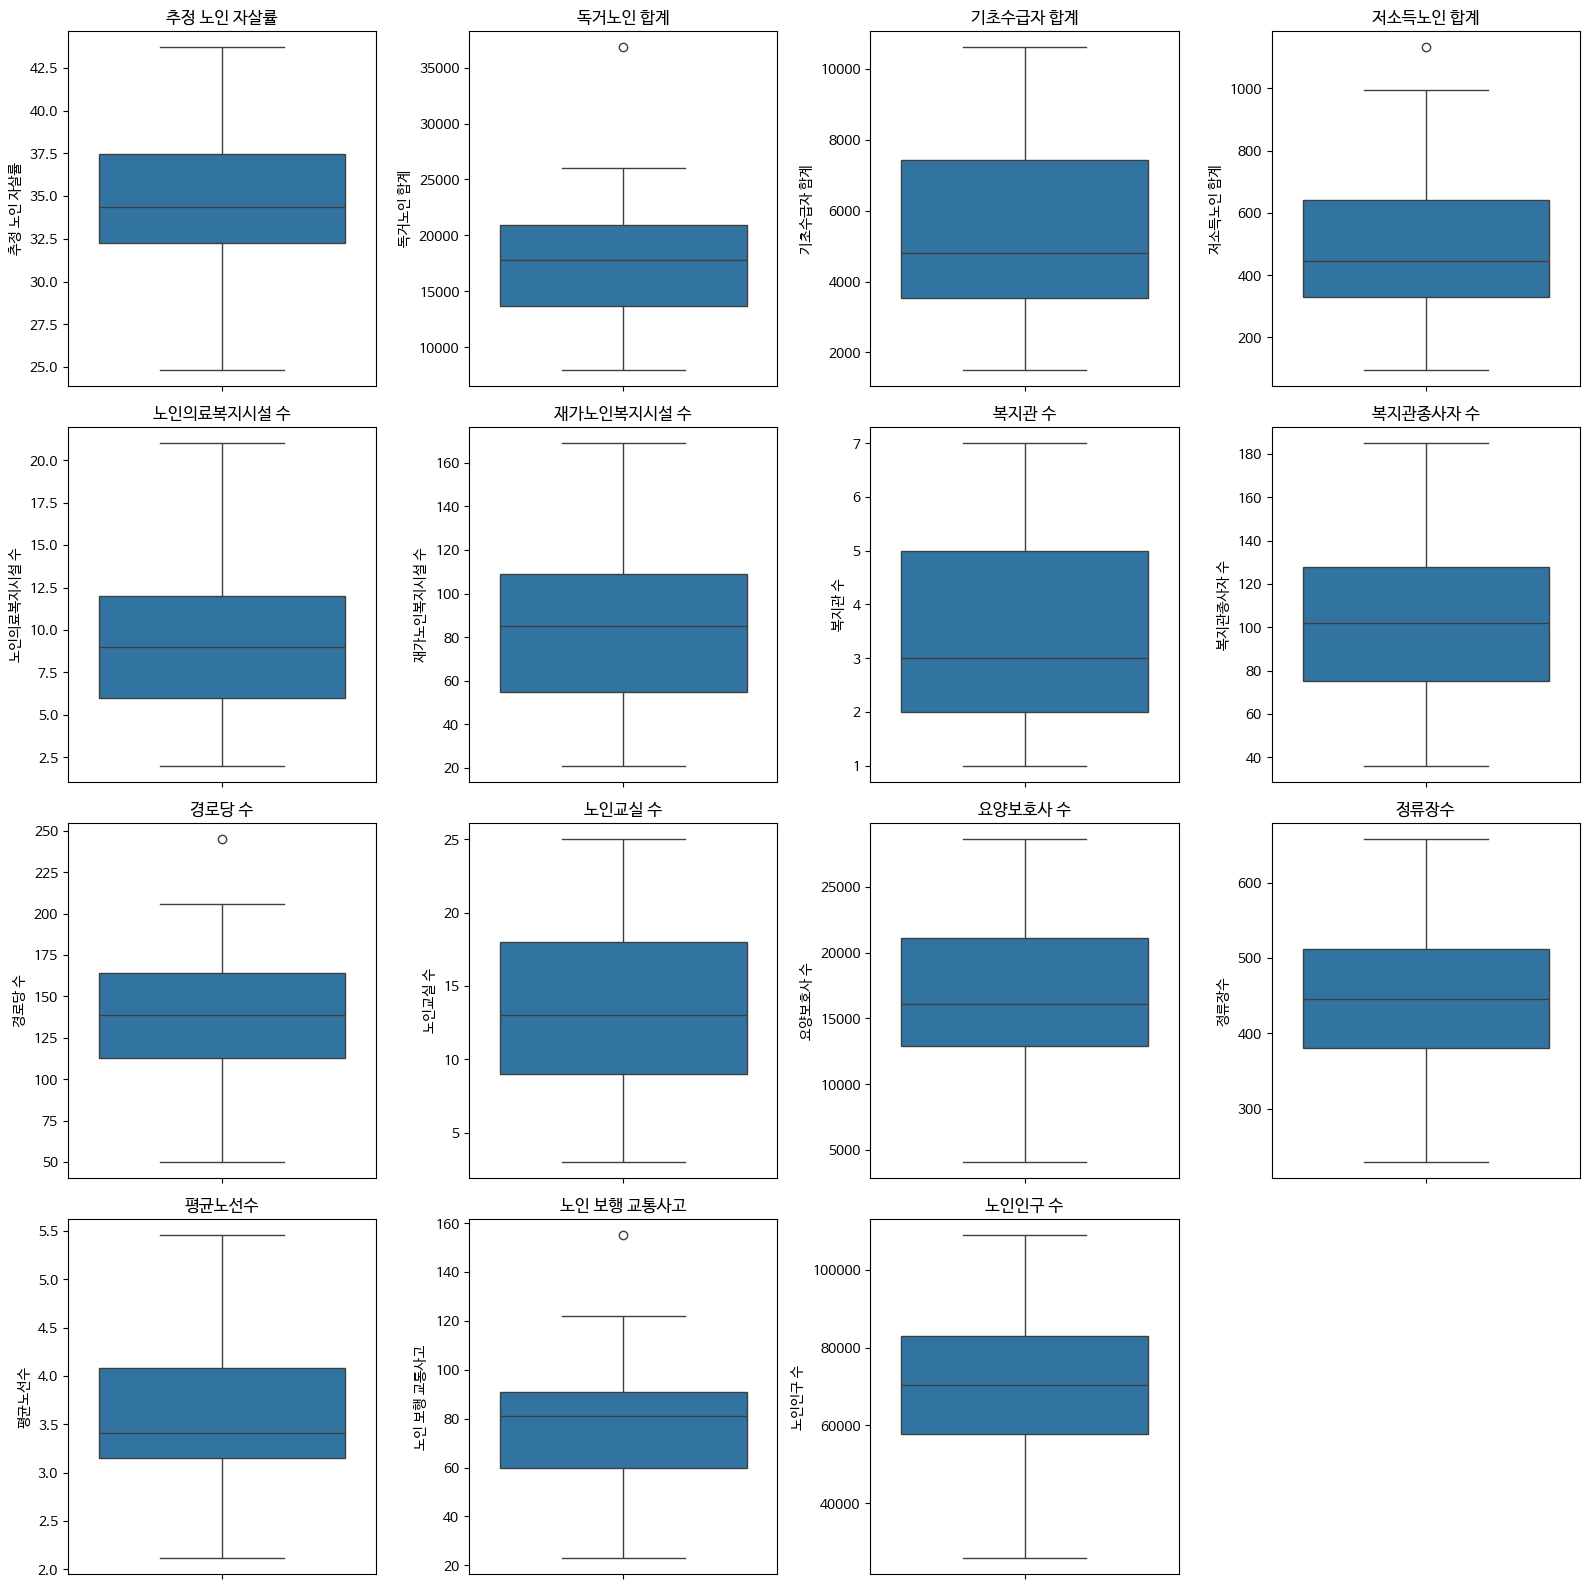

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if 'Ï∂îÏ†ïÎÖ∏Ïù∏ÏûêÏÇ¥Î•†' in numeric_cols:
    numeric_cols.remove('Ï∂îÏ†ïÎÖ∏Ïù∏ÏûêÏÇ¥Î•†')

# Í∑∏ÎûòÌîÑ Íµ¨ÏÑ± (Ìïú ÌñâÏóê 4Í∞úÏî©)
cols_per_row = 4
num_cols = len(numeric_cols)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 4, num_rows * 4))

for idx, col in enumerate(numeric_cols):
    plt.subplot(num_rows, cols_per_row, idx + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## k-means clustering

In [ ]:
!pip install geopandas

##PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

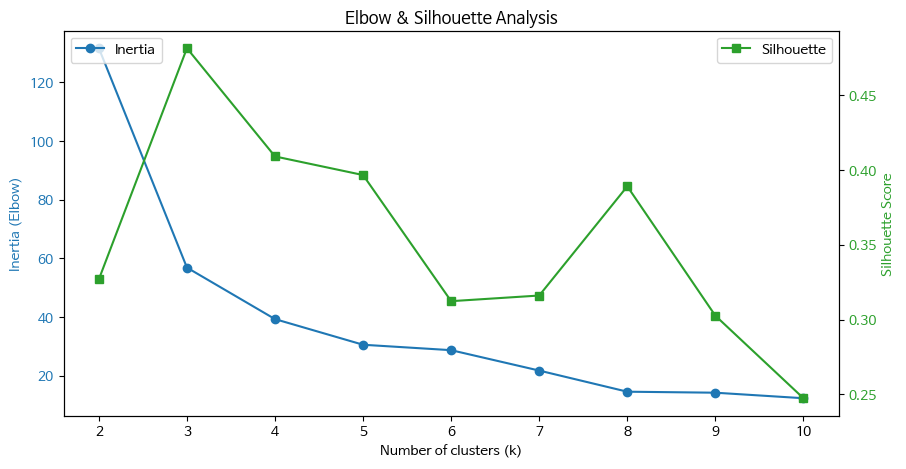

In [ ]:
# ÏûêÏπòÍµ¨Î™Ö Ï†ïÎ¶¨ Ìï®Ïàò
def clean_gu(name):
    return re.sub(r'[^Í∞Ä-Ìû£]', '', str(name)).replace('ÏÑúÏö∏ÌäπÎ≥ÑÏãú', '').strip()

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_excel("/content/drive/MyDrive/ÏΩîÎû©/Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù/ÌåÄÌîå/Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_ÎÖ∏Ïù∏Ïù∏Íµ¨Ìè¨Ìï®.xlsx", sheet_name="Sheet1")
df["ÏûêÏπòÍµ¨"] = df["ÏûêÏπòÍµ¨"].apply(clean_gu)

# 1Ïù∏ÎãπÏúºÎ°ú ÌôòÏÇ∞Ìï† Î≥ÄÏàò Î™©Î°ù
per_capita_vars = [
    "ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ", "Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ", "Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ",
    "ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò", "Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò", "Î≥µÏßÄÍ¥Ä Ïàò",
    "Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò", "ÎÖ∏Ïù∏ÍµêÏã§ Ïàò", "Ï†ïÎ•òÏû•Ïàò"
]

for var in per_capita_vars:
    df[f"1Ïù∏Îãπ {var}"] = df[var] / df["ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò"]
df = df.drop(columns=per_capita_vars)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎåÄÏÉÅ Î≥ÄÏàò
features_for_clustering = df.columns.drop("ÏûêÏπòÍµ¨")
X_filtered = df[features_for_clustering]
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)

# PCAÎ°ú 2DÎ°ú Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

# Elbow & Silhouette Í≥ÑÏÇ∞
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(K_range, inertias, marker='o', color=color, label="Inertia")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, marker='s', color=color, label="Silhouette")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper right")

plt.title("Elbow & Silhouette Analysis")
plt.show()


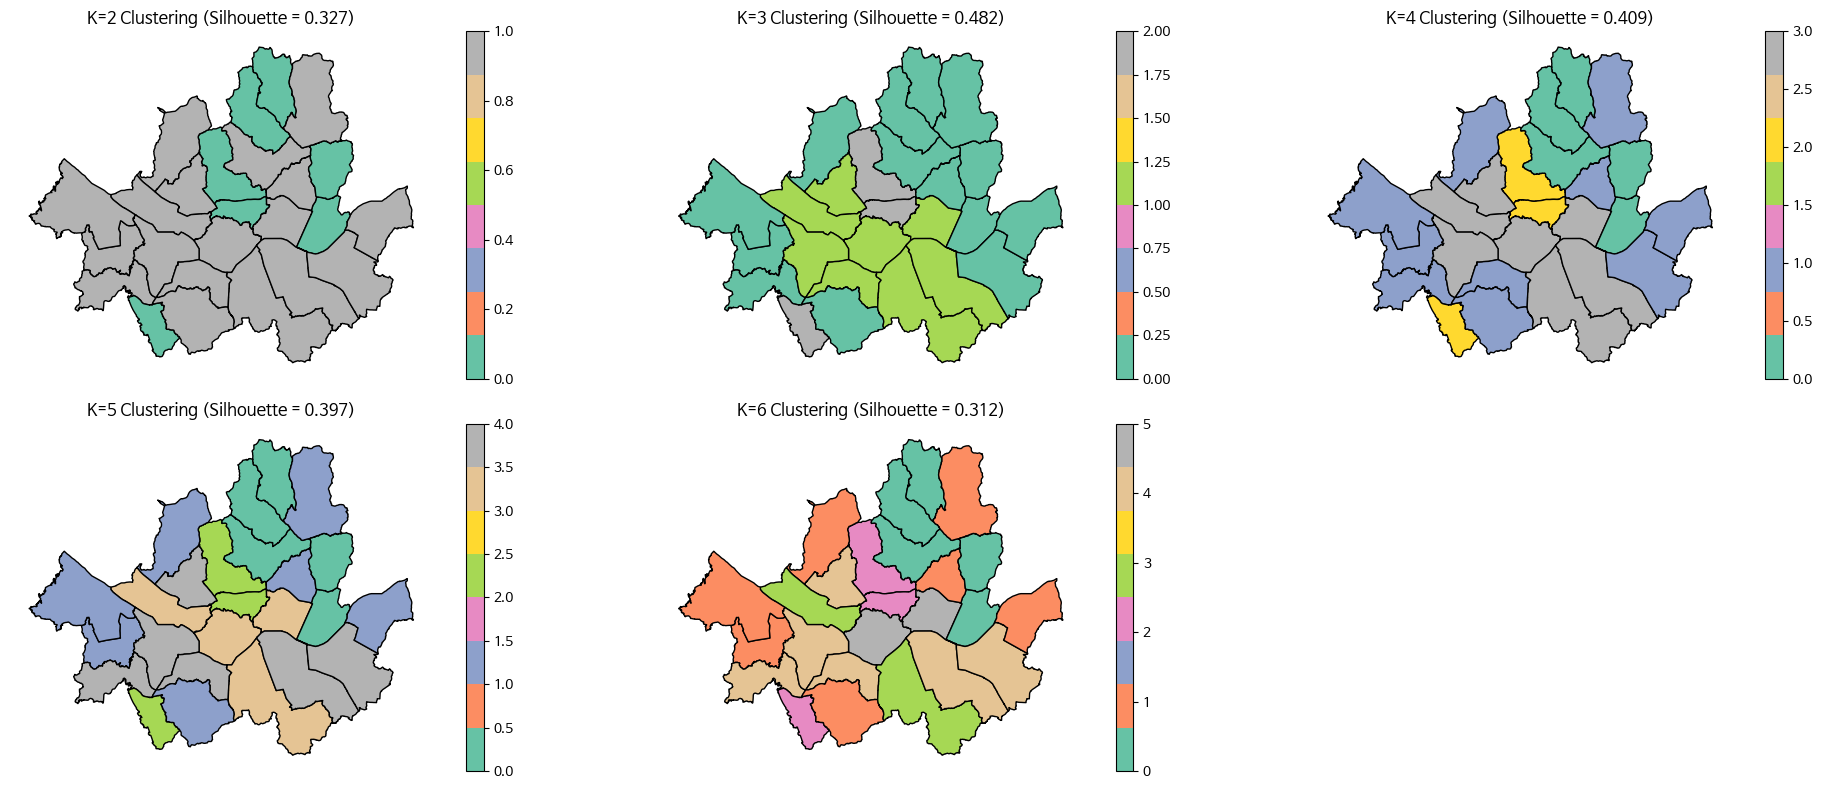

üìä Ïã§Î£®Ïó£ Í≥ÑÏàò (PCA 2D Ï∂ïÏÜå ÌõÑ):
K=2: 0.327
K=3: 0.4816
K=4: 0.4092
K=5: 0.3967
K=6: 0.3123


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏßÄÎèÑ ÏãúÍ∞ÅÌôî
silhouette_scores_pca = {}
cluster_summaries_pca = {}

plt.figure(figsize=(20, 8))

for idx, k in enumerate(range(2, 7)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f"ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_{k}"] = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, df[f"ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_{k}"])
    silhouette_scores_pca[k] = round(score, 4)

    summary = df.groupby(f"ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_{k}")[features_for_clustering].mean()
    cluster_summaries_pca[k] = summary

    # ÏßÄÎèÑ ÏãúÍ∞ÅÌôî
    shp_path = "/content/drive/MyDrive/ÏΩîÎû©/Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù/ÌåÄÌîå/data/LARD_ADM_SECT_SGG_11_202505.shp"
    gdf = gpd.read_file(shp_path)
    gdf = gdf.rename(columns={"SGG_NM": "ÏûêÏπòÍµ¨"})
    gdf["ÏûêÏπòÍµ¨"] = gdf["ÏûêÏπòÍµ¨"].apply(clean_gu)
    gdf = gdf.to_crs(epsg=4326)

    merged = gdf.merge(df, on="ÏûêÏπòÍµ¨", how="left")
    plt.subplot(2, 3, idx + 1)
    merged.plot(column=f"ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_{k}", cmap="Set2", legend=True, edgecolor="black", ax=plt.gca())
    plt.title(f"K={k} Clustering (Silhouette = {silhouette_scores_pca[k]:.3f})", fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä Ïã§Î£®Ïó£ Í≥ÑÏàò (PCA 2D Ï∂ïÏÜå ÌõÑ):")
for k, score in silhouette_scores_pca.items():
    print(f"K={k}: {score}")

In [ ]:
cols_to_use = [
    'Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†', 'Í≤ΩÎ°úÎãπ Ïàò', 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò', 'ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò', 'ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†',
    'ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò', '1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', '1Ïù∏Îãπ Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', '1Ïù∏Îãπ Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ',
    '1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò', '1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò', '1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò',
    '1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò', '1Ïù∏Îãπ ÎÖ∏Ïù∏ÍµêÏã§ Ïàò', '1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò'
]

cluster_summary = df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3')[cols_to_use].mean()
cluster_summary

Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†       Í≤ΩÎ°úÎãπ Ïàò       ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò     ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò  ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                              
0           36.159707  154.071429  20437.196429  3.609024      91.500   
1           31.100641  143.500000  12142.000000  3.554277      61.375   
2           40.252991   61.666667   6245.666667  4.089782      67.000   

               ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò  1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  1Ïù∏Îãπ Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  1Ïù∏Îãπ Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                       
0           82014.500     0.261753      0.083290      0.008039   
1           61933.375     0.234724      0.054872      0.005394   
2           33342.000     0.322079      0.081704      0.013755   

            1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò  1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                            
0                 0.000157        0.001329   0.000040      0.001304   
1                 0.000076        0.000939   0.000065      0.001525   
2                 0.000221        0.001096   0.000090      0.004202   

            1Ïù∏Îãπ ÎÖ∏Ïù∏ÍµêÏã§ Ïàò  1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò  
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                        
0             0.000178  0.005499  
1             0.000251  0.008220  
2             0.000194  0.010109

In [ ]:
print(df[['ÏûêÏπòÍµ¨', 'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3']])

     ÏûêÏπòÍµ¨  ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3
0    Ï¢ÖÎ°úÍµ¨           2
1     Ï§ëÍµ¨           2
2    Ïö©ÏÇ∞Íµ¨           1
3    ÏÑ±ÎèôÍµ¨           1
4    Í¥ëÏßÑÍµ¨           0
5   ÎèôÎåÄÎ¨∏Íµ¨           0
6    Ï§ëÎûëÍµ¨           0
7    ÏÑ±Î∂ÅÍµ¨           0
8    Í∞ïÎ∂ÅÍµ¨           0
9    ÎèÑÎ¥âÍµ¨           0
10   ÎÖ∏ÏõêÍµ¨           0
11   ÏùÄÌèâÍµ¨           0
12  ÏÑúÎåÄÎ¨∏Íµ¨           1
13   ÎßàÌè¨Íµ¨           1
14   ÏñëÏ≤úÍµ¨           0
15   Í∞ïÏÑúÍµ¨           0
16   Íµ¨Î°úÍµ¨           0
17   Í∏àÏ≤úÍµ¨           2
18  ÏòÅÎì±Ìè¨Íµ¨           1
19   ÎèôÏûëÍµ¨           1
20   Í¥ÄÏïÖÍµ¨           0
21   ÏÑúÏ¥àÍµ¨           1
22   Í∞ïÎÇ®Íµ¨           1
23   ÏÜ°ÌååÍµ¨           0
24   Í∞ïÎèôÍµ¨           0


In [ ]:
cluster_summary

Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†       Í≤ΩÎ°úÎãπ Ïàò       ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò     ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò  ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                              
0           36.159707  154.071429  20437.196429  3.609024      91.500   
1           31.100641  143.500000  12142.000000  3.554277      61.375   
2           40.252991   61.666667   6245.666667  4.089782      67.000   

               ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò  1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  1Ïù∏Îãπ Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  1Ïù∏Îãπ Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                       
0           82014.500     0.261753      0.083290      0.008039   
1           61933.375     0.234724      0.054872      0.005394   
2           33342.000     0.322079      0.081704      0.013755   

            1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò  1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  \
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                                                            
0                 0.000157        0.001329   0.000040      0.001304   
1                 0.000076        0.000939   0.000065      0.001525   
2                 0.000221        0.001096   0.000090      0.004202   

            1Ïù∏Îãπ ÎÖ∏Ïù∏ÍµêÏã§ Ïàò  1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò  
ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3                        
0             0.000178  0.005499  
1             0.000251  0.008220  
2             0.000194  0.010109

In [ ]:
# Íµ∞ÏßëÎ≥Ñ ÎåÄÌëú ÏûêÏπòÍµ¨ Ï∞æÍ∏∞
representative_districts = {}

for cluster_num in df_cleaned['ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3'].unique():
    # Ìï¥Îãπ Íµ∞Ïßë Îç∞Ïù¥ÌÑ∞
    cluster_data = df_cleaned[df_cleaned['ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3'] == cluster_num][cols_to_use]

    # Íµ∞Ïßë Ï§ëÏã¨ (ÌèâÍ∑†Í∞í)
    cluster_center = cluster_data.mean().values.reshape(1, -1)

    # Í∞Å ÏûêÏπòÍµ¨ Îç∞Ïù¥ÌÑ∞ÏôÄ Íµ∞Ïßë Ï§ëÏã¨ Í±∞Î¶¨ Í≥ÑÏÇ∞
    indices, distances = pairwise_distances_argmin_min(cluster_data, cluster_center)

    # ÎåÄÌëú ÏûêÏπòÍµ¨: Ï§ëÏã¨Í∞íÍ≥º Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏûêÏπòÍµ¨
    closest_gu = df_cleaned[df_cleaned['ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3'] == cluster_num].iloc[indices[0]]['ÏûêÏπòÍµ¨']
    representative_districts[cluster_num] = closest_gu

print("\nClusterÎ≥Ñ ÎåÄÌëú ÏûêÏπòÍµ¨:")
for cluster_num, gu_name in representative_districts.items():
    print(f"Cluster {cluster_num}: {gu_name}")


ClusterÎ≥Ñ ÎåÄÌëú ÏûêÏπòÍµ¨:
Cluster 2: Ï¢ÖÎ°úÍµ¨
Cluster 1: Ïö©ÏÇ∞Íµ¨
Cluster 0: Í¥ëÏßÑÍµ¨


<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]
<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]
<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]


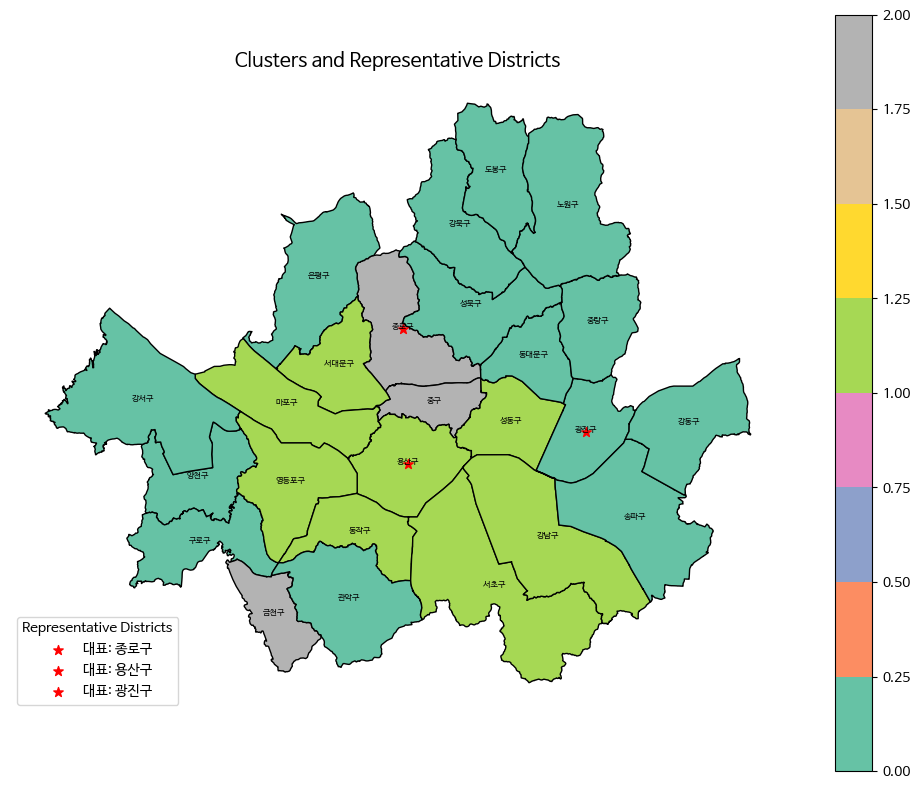

In [ ]:
shp_path = "/content/drive/MyDrive/ÏΩîÎû©/Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù/ÌåÄÌîå/data/LARD_ADM_SECT_SGG_11_202505.shp"
gdf = gpd.read_file(shp_path).rename(columns={"SGG_NM": "ÏûêÏπòÍµ¨"})
gdf["ÏûêÏπòÍµ¨"] = gdf["ÏûêÏπòÍµ¨"].apply(lambda x: x.replace("ÏÑúÏö∏ÌäπÎ≥ÑÏãú", "").strip())
gdf = gdf.to_crs(epsg=4326)

# Íµ∞Ïßë Í≤∞Í≥ºÎ•º Î≥ëÌï©
merged = gdf.merge(df_cleaned[['ÏûêÏπòÍµ¨', 'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3']], on='ÏûêÏπòÍµ¨', how='left')

# ÏßÄÎèÑ ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column='ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3', cmap='Set2', legend=True, edgecolor='black', ax=ax)
ax.set_title("Clusters and Representative Districts", fontsize=14)

# ÎåÄÌëú ÏûêÏπòÍµ¨ ÏúÑÏπòÎßå Í∞ïÏ°∞ (Î≥Ñ ÌëúÏãú)
for cluster_num, gu_name in representative_districts.items():
    rep_row = merged[merged['ÏûêÏπòÍµ¨'] == gu_name]
    centroid = rep_row.geometry.centroid.iloc[0]
    ax.scatter(centroid.x, centroid.y, color='red', s=50, marker='*', label=f'ÎåÄÌëú: {gu_name}')

# üîπ Í∞Å ÏûêÏπòÍµ¨ Ïù¥Î¶ÑÏùÑ **ÌïúÍ∏ÄÎ°ú** ÌëúÏãú
for idx, row in merged.iterrows():
    if pd.notnull(row['ÏûêÏπòÍµ¨']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['ÏûêÏπòÍµ¨'], ha='center', fontsize=6, color='black')

# Ï∂ï Ï†úÍ±∞ Î∞è Î≤îÎ°Ä ÌëúÏãú
ax.axis("off")
ax.legend(title='Representative Districts', loc='lower left')
plt.tight_layout()
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïö∞ÏÑ†ÏàúÏúÑ ÎèÑÏ∂ú

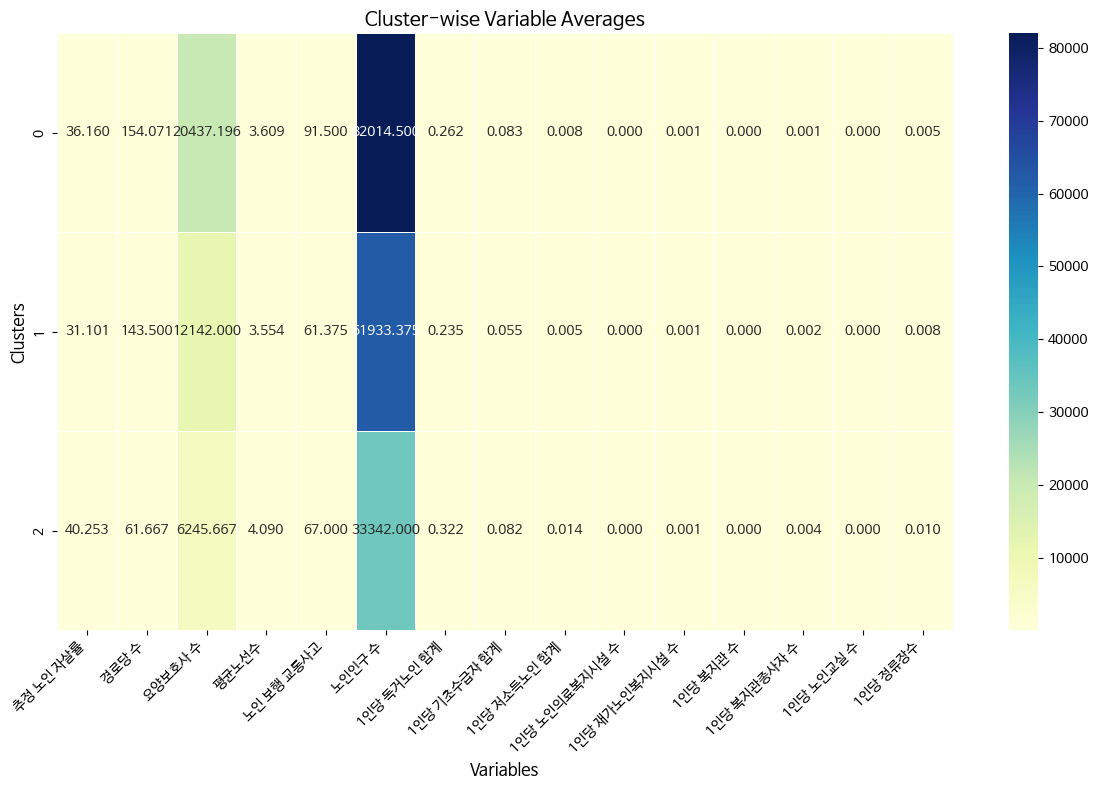

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('Cluster-wise Variable Averages', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ï∞®Ïù¥Í∞Ä ÌÅ∞ Î≥ÄÏàòÎì§: ['Í≤ΩÎ°úÎãπ Ïàò', 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò', 'ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†', 'ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò']


<ipython-input-42-b22c1188b788>:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


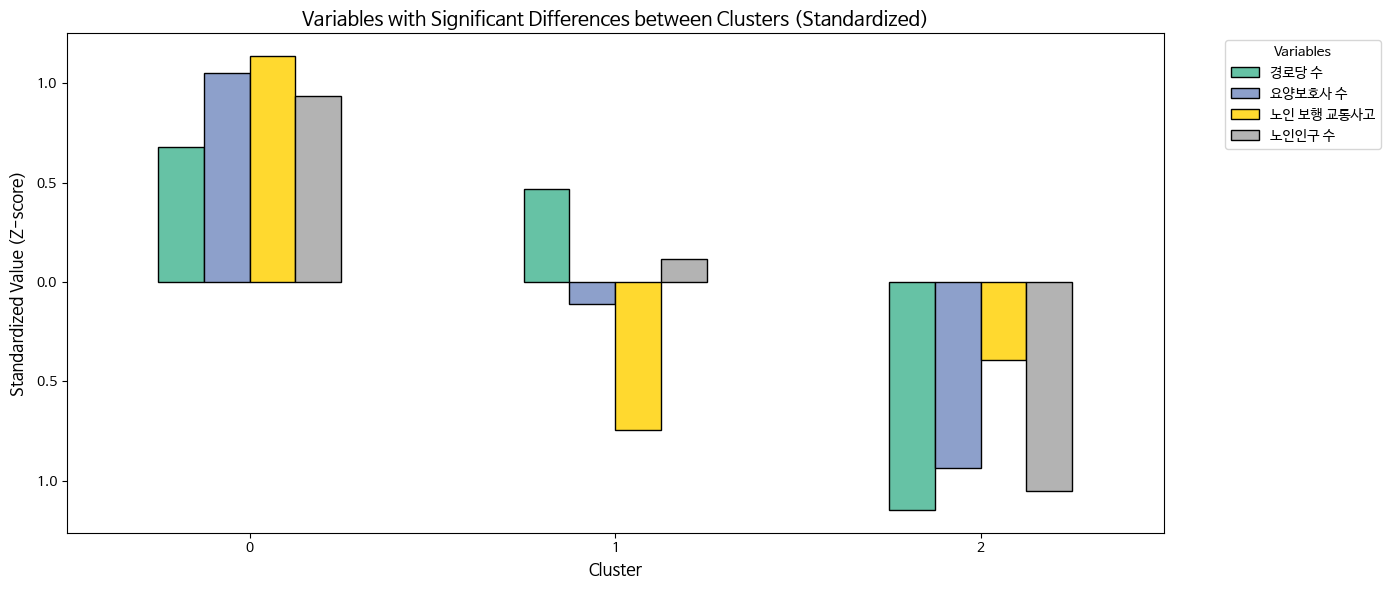

In [ ]:
diff = cluster_summary.max() - cluster_summary.min()

# Ï∞®Ïù¥Í∞Ä ÌÅ∞ Î≥ÄÏàòÎßå ÏÑ†ÌÉù (Ïòà: 10 Ïù¥ÏÉÅ Ï∞®Ïù¥)
important_vars = diff[diff > 10].index.tolist()
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ Ï∞®Ïù¥Í∞Ä ÌÅ∞ Î≥ÄÏàòÎì§:", important_vars)

# Ï∞®Ïù¥Í∞Ä ÌÅ∞ Î≥ÄÏàòÎßå ÏÑ†ÌÉù
cluster_summary_selected = cluster_summary[important_vars]

# Z-scoreÎ°ú Î≥ÄÌôò (ÌëúÏ§ÄÌôî)
cluster_summary_standardized = (cluster_summary_selected - cluster_summary_selected.mean()) / cluster_summary_selected.std()

# Î∞î Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
cluster_summary_standardized.plot(kind='bar', figsize=(14, 6), colormap='Set2', edgecolor='black')
plt.title('Variables with Significant Differences between Clusters (Standardized)', fontsize=14)
plt.ylabel('Standardized Value (Z-score)', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#  Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î≥ÄÏàò ÏßÄÏ†ï
infra_vars = ['1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò', '1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò', '1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò']
service_vars = ['ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò', '1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò']
mobility_vars = ['1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò', 'ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò']
vulnerable_vars = ['1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', 'Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†']

#  Z-scoreÎ°ú ÌëúÏ§ÄÌôî
standardized = (cluster_summary - cluster_summary.mean()) / cluster_summary.std()

# Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
weights = {
    'infra': 0.15,
    'service': 0.25,
    'mobility': 0.15,
    'vulnerable': 0.45
}

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† Ï†êÏàò (Ï∑®ÏïΩÍ≥ÑÏ∏µ Ïó≠Î∞©Ìñ•)
infra_score = standardized[infra_vars].mean(axis=1)
service_score = standardized[service_vars].mean(axis=1)
mobility_score = standardized[mobility_vars].mean(axis=1)
vulnerable_score = -standardized[vulnerable_vars].mean(axis=1)

# Í∞ÄÏ§ëÌï©ÏúºÎ°ú ÏµúÏ¢Ö Ïö∞ÏÑ†ÏàúÏúÑ Ï†êÏàò Í≥ÑÏÇ∞
priority_score = (
    infra_score * weights['infra'] +
    service_score * weights['service'] +
    mobility_score * weights['mobility'] +
    vulnerable_score * weights['vulnerable']
)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
priority_df = pd.DataFrame({
    'Priority Score': priority_score
}, index=[0, 1, 2])

# ÏûêÏπòÍµ¨-ÌÅ¥Îü¨Ïä§ÌÑ∞ Îß§Ìïë
gu_cluster_df = pd.DataFrame({
    'ÏûêÏπòÍµ¨': ['Ï¢ÖÎ°úÍµ¨', 'Ï§ëÍµ¨', 'Ïö©ÏÇ∞Íµ¨', 'ÏÑ±ÎèôÍµ¨', 'Í¥ëÏßÑÍµ¨', 'ÎèôÎåÄÎ¨∏Íµ¨', 'Ï§ëÎûëÍµ¨', 'ÏÑ±Î∂ÅÍµ¨', 'Í∞ïÎ∂ÅÍµ¨', 'ÎèÑÎ¥âÍµ¨',
             'ÎÖ∏ÏõêÍµ¨', 'ÏùÄÌèâÍµ¨', 'ÏÑúÎåÄÎ¨∏Íµ¨', 'ÎßàÌè¨Íµ¨', 'ÏñëÏ≤úÍµ¨', 'Í∞ïÏÑúÍµ¨', 'Íµ¨Î°úÍµ¨', 'Í∏àÏ≤úÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨',
             'Í¥ÄÏïÖÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨'],
    'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3': [2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0, 2, 1, 1,
                    0, 1, 1, 0, 0]
})

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏûêÏπòÍµ¨Î™Ö Î¶¨Ïä§Ìä∏Î°ú Ï†ïÎ¶¨
cluster_gu_dict = gu_cluster_df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3')['ÏûêÏπòÍµ¨'].apply(list).to_dict()

# Ïö∞ÏÑ†ÏàúÏúÑ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
priority_df_sorted = priority_df.sort_values('Priority Score', ascending=True)
priority_df_sorted['Ï†ïÏ±Ö ÎèÑÏûÖ ÏàúÏúÑ'] = range(1, len(priority_df_sorted) + 1)

# Í∞Å ÏàúÏúÑÎ≥ÑÎ°ú Ìè¨Ìï®Îêú ÏûêÏπòÍµ¨ Ï∂úÎ†•
print(" ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏµúÏ¢Ö Ï†ïÏ±Ö ÎèÑÏûÖ ÏàúÏúÑ Î∞è ÏûêÏπòÍµ¨:")
for idx, row in priority_df_sorted.iterrows():
    cluster_id = idx
    gu_list = cluster_gu_dict.get(cluster_id, [])
    ÏàúÏúÑ = int(row['Ï†ïÏ±Ö ÎèÑÏûÖ ÏàúÏúÑ'])
    print(f"\nÏàúÏúÑ {ÏàúÏúÑ}ÏúÑ (ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}) - Ï†ïÏ±Ö ÏãúÍ∏âÎèÑ: {row['Priority Score']:.3f}")
    print("Ìè¨Ìï®Îêú ÏûêÏπòÍµ¨:", ', '.join(gu_list))

 ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏµúÏ¢Ö Ï†ïÏ±Ö ÎèÑÏûÖ ÏàúÏúÑ Î∞è ÏûêÏπòÍµ¨:

ÏàúÏúÑ 1ÏúÑ (ÌÅ¥Îü¨Ïä§ÌÑ∞ 2) - Ï†ïÏ±Ö ÏãúÍ∏âÎèÑ: -0.190
Ìè¨Ìï®Îêú ÏûêÏπòÍµ¨: Ï¢ÖÎ°úÍµ¨, Ï§ëÍµ¨, Í∏àÏ≤úÍµ¨

ÏàúÏúÑ 2ÏúÑ (ÌÅ¥Îü¨Ïä§ÌÑ∞ 0) - Ï†ïÏ±Ö ÏãúÍ∏âÎèÑ: -0.018
Ìè¨Ìï®Îêú ÏûêÏπòÍµ¨: Í¥ëÏßÑÍµ¨, ÎèôÎåÄÎ¨∏Íµ¨, Ï§ëÎûëÍµ¨, ÏÑ±Î∂ÅÍµ¨, Í∞ïÎ∂ÅÍµ¨, ÎèÑÎ¥âÍµ¨, ÎÖ∏ÏõêÍµ¨, ÏùÄÌèâÍµ¨, ÏñëÏ≤úÍµ¨, Í∞ïÏÑúÍµ¨, Íµ¨Î°úÍµ¨, Í¥ÄÏïÖÍµ¨, ÏÜ°ÌååÍµ¨, Í∞ïÎèôÍµ¨

ÏàúÏúÑ 3ÏúÑ (ÌÅ¥Îü¨Ïä§ÌÑ∞ 1) - Ï†ïÏ±Ö ÏãúÍ∏âÎèÑ: 0.208
Ìè¨Ìï®Îêú ÏûêÏπòÍµ¨: Ïö©ÏÇ∞Íµ¨, ÏÑ±ÎèôÍµ¨, ÏÑúÎåÄÎ¨∏Íµ¨, ÎßàÌè¨Íµ¨, ÏòÅÎì±Ìè¨Íµ¨, ÎèôÏûëÍµ¨, ÏÑúÏ¥àÍµ¨, Í∞ïÎÇ®Íµ¨


In [ ]:
# Î∂àÌïÑÏöîÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïó¥ Ï†úÍ±∞
df_cleaned = df.drop(columns=['ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_2', 'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_4', 'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_5', 'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_6'])

# Í≤∞Í≥º ÌôïÏù∏
print(df_cleaned.columns)

Index(['ÏûêÏπòÍµ¨', 'Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†', 'Í≤ΩÎ°úÎãπ Ïàò', 'ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò', 'ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò', 'ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†', 'ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò',
       '1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ', '1Ïù∏Îãπ Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ', '1Ïù∏Îãπ Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ', '1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò',
       '1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò', '1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò', '1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò', '1Ïù∏Îãπ ÎÖ∏Ïù∏ÍµêÏã§ Ïàò', '1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò',
       'ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3'],
      dtype='object')


## Cluster 1ÏóêÏÑúÏùò ÏÑ∏Î∂Ä ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [ ]:
df_cluster_1 = df_cleaned[df_cleaned['ÌÅ¥Îü¨Ïä§ÌÑ∞_PCA_3'] == 1].copy()

X_1 = df_cluster_1[cols_to_use]

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)

pca = PCA(n_components=2)
X_1_pca = pca.fit_transform(X_1_scaled)

ssd = []
silhouette_scores = {}

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_1_pca)

    ssd.append(kmeans.inertia_)
    sil_score = silhouette_score(X_1_pca, labels)
    silhouette_scores[k] = sil_score

    df_cluster_1[f'ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_{k}'] = labels

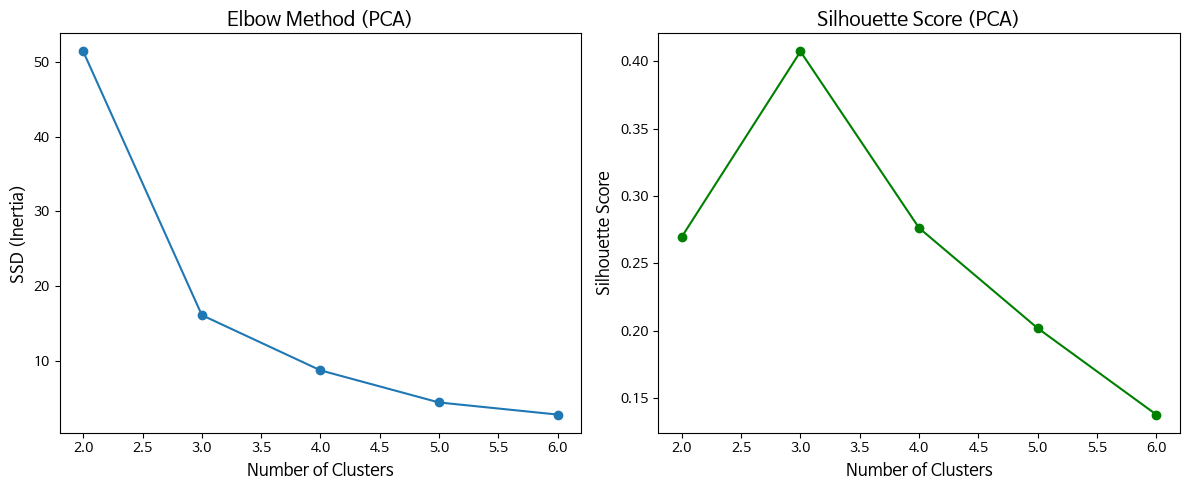

In [ ]:
plt.figure(figsize=(12, 5))

# Elbow
plt.subplot(1, 2, 1)
plt.plot(range(2, 7), ssd, 'o-')
plt.title('Elbow Method (PCA)', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('SSD (Inertia)', fontsize=12)

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'o-', color='green')
plt.title('Silhouette Score (PCA)', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
best_k_1 = max(silhouette_scores, key=silhouette_scores.get)
print(f" cluster 1Ïùò ÏµúÏ†Å k: {best_k_1} (Ïã§Î£®Ïó£ Í≥ÑÏàò: {silhouette_scores[best_k_1]:.3f})")

 cluster 1Ïùò ÏµúÏ†Å k: 3 (Ïã§Î£®Ïó£ Í≥ÑÏàò: 0.407)


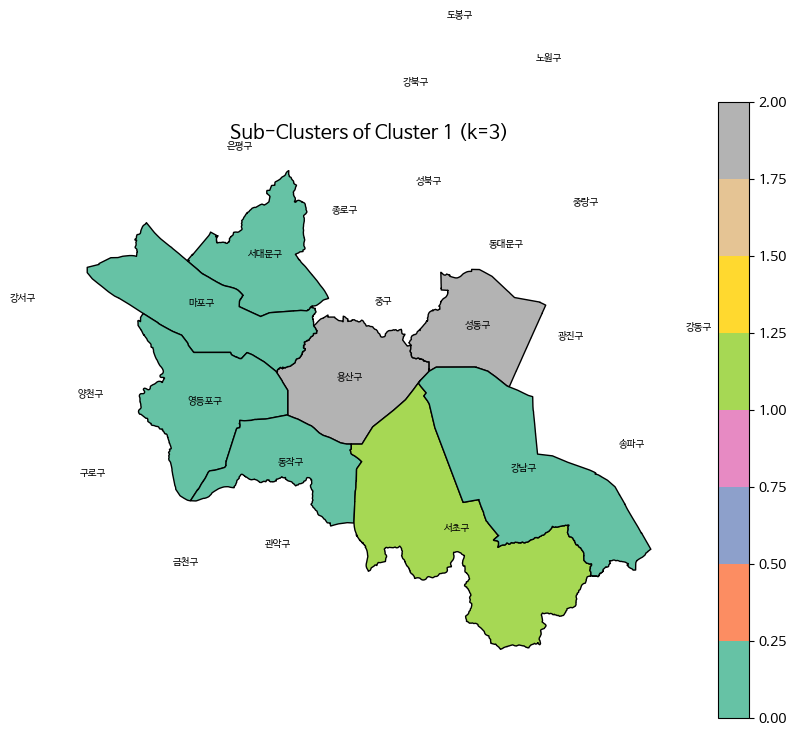

In [ ]:
shp_path = "/content/drive/MyDrive/ÏΩîÎû©/Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù/ÌåÄÌîå/data/LARD_ADM_SECT_SGG_11_202505.shp"
gdf = gpd.read_file(shp_path).rename(columns={"SGG_NM": "ÏûêÏπòÍµ¨"})
gdf["ÏûêÏπòÍµ¨"] = gdf["ÏûêÏπòÍµ¨"].apply(lambda x: x.replace("ÏÑúÏö∏ÌäπÎ≥ÑÏãú", "").strip())
gdf = gdf.to_crs(epsg=4326)

# Î≥ëÌï© (ÏûêÏπòÍµ¨ Ïù¥Î¶ÑÏúºÎ°ú)
merged_1 = gdf.merge(df_cluster_1[['ÏûêÏπòÍµ¨', f'ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_{best_k_1}']], on='ÏûêÏπòÍµ¨', how='left')

# ÏßÄÎèÑ ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 8))
merged_1.plot(column=f'ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_{best_k_1}', cmap='Set2', legend=True, edgecolor='black', ax=ax)
ax.set_title(f"Sub-Clusters of Cluster 1 (k={best_k_1})", fontsize=14)

# ÌïúÍ∏Ä ÏûêÏπòÍµ¨ Ïù¥Î¶Ñ ÌëúÍ∏∞
for idx, row in merged_1.iterrows():
    if pd.notnull(row['ÏûêÏπòÍµ¨']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['ÏûêÏπòÍµ¨'], ha='center', fontsize=7, color='black')

# Ï∂ï Ï†úÍ±∞
ax.axis("off")
plt.show()


In [ ]:
# ÏµúÏ†ÅÏùò k (Ïòà: Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ k=3 ÏÑ†ÌÉù)
best_k_1 = 3

# ÏÑ†ÌÉùÎêú ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïó¥ Ïù¥Î¶Ñ
subcluster_col = f'ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_{best_k_1}'

# ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
subcluster_summary = df_cluster_1.groupby(subcluster_col)[cols_to_use].mean().round(3)

print(" Cluster 1Ïùò ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í:")
subcluster_summary

 Cluster 1Ïùò ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í:


Ï∂îÏ†ï ÎÖ∏Ïù∏ ÏûêÏÇ¥Î•†  Í≤ΩÎ°úÎãπ Ïàò  ÏöîÏñëÎ≥¥Ìò∏ÏÇ¨ Ïàò  ÌèâÍ∑†ÎÖ∏ÏÑ†Ïàò  ÎÖ∏Ïù∏ Î≥¥Ìñâ ÍµêÌÜµÏÇ¨Í≥†   ÎÖ∏Ïù∏Ïù∏Íµ¨ Ïàò  1Ïù∏Îãπ ÎèÖÍ±∞ÎÖ∏Ïù∏ Ìï©Í≥Ñ  \
ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_3                                                                       
0            31.469  151.2  14261.0  3.836        71.2  68119.4        0.240   
1            24.836  139.0   9663.0  4.085        52.0  65661.0        0.167   
2            33.313  126.5   8084.0  2.584        41.5  44604.5        0.255   

          1Ïù∏Îãπ Í∏∞Ï¥àÏàòÍ∏âÏûê Ìï©Í≥Ñ  1Ïù∏Îãπ Ï†ÄÏÜåÎìùÎÖ∏Ïù∏ Ìï©Í≥Ñ  1Ïù∏Îãπ ÎÖ∏Ïù∏ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§ Ïàò  1Ïù∏Îãπ Ïû¨Í∞ÄÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§ Ïàò  \
ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_3                                                               
0                0.051         0.007             0.0           0.001   
1                0.036         0.003             0.0           0.001   
2                0.074         0.004             0.0           0.001   

          1Ïù∏Îãπ Î≥µÏßÄÍ¥Ä Ïàò  1Ïù∏Îãπ Î≥µÏßÄÍ¥ÄÏ¢ÖÏÇ¨Ïûê Ïàò  1Ïù∏Îãπ ÎÖ∏Ïù∏ÍµêÏã§ Ïàò  1Ïù∏Îãπ Ï†ïÎ•òÏû•Ïàò  
ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_3                                                 
0               0.0         0.001         0.0     0.008  
1               0.0         0.002         0.0     0.010  
2               0.0         0.002         0.0     0.009

In [ ]:
# ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ï†ÄÏû•Îêú Ïª¨Îüº Ïù¥Î¶Ñ
subcluster_col = 'ÌïòÏúÑÌÅ¥Îü¨Ïä§ÌÑ∞_3'

# ÏÑúÎ∏å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏûêÏπòÍµ¨ Ïù¥Î¶Ñ Ï∂úÎ†•
for cluster_label in df_cluster_1[subcluster_col].unique():
    gu_list = df_cluster_1[df_cluster_1[subcluster_col] == cluster_label]['ÏûêÏπòÍµ¨'].tolist()
    print(f" Sub-cluster {cluster_label}Ïóê ÏÜçÌïòÎäî ÏûêÏπòÍµ¨:")
    print(gu_list)
    print()

 Sub-cluster 2Ïóê ÏÜçÌïòÎäî ÏûêÏπòÍµ¨:
['Ïö©ÏÇ∞Íµ¨', 'ÏÑ±ÎèôÍµ¨']

 Sub-cluster 0Ïóê ÏÜçÌïòÎäî ÏûêÏπòÍµ¨:
['ÏÑúÎåÄÎ¨∏Íµ¨', 'ÎßàÌè¨Íµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'Í∞ïÎÇ®Íµ¨']

 Sub-cluster 1Ïóê ÏÜçÌïòÎäî ÏûêÏπòÍµ¨:
['ÏÑúÏ¥àÍµ¨']

